<a href="https://colab.research.google.com/github/Sharika224/Netflix_Clone/blob/main/UNET_Implementation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Oxford-IIIT Pet Dataset

The oxford_iiit_pet dataset from TensorFlow Datasets (TFDS) is a popular dataset used for image segmentation and classification tasks, particularly in the field of computer vision.

The Oxford-IIIT Pet Dataset is a collection of images and corresponding annotations of 37 pet breeds, with roughly 200 images per breed. The dataset is used for both image classification and image segmentation tasks.

# Loading the datasets

In [2]:
def load_data():
    dataset, info = tfds.load('oxford_iiit_pet:3.2.0', with_info=True)
    return dataset['train'], dataset['test']

# Preprocessing the image

In [3]:
def preprocess_image(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask = tf.cast(input_mask, tf.float32) / 255.0

    return input_image, input_mask

# Data Preparation

In [4]:
def prepare_data(train_data, test_data, batch_size=32):
    train_dataset = train_data.map(preprocess_image).batch(batch_size).shuffle(1000)
    test_dataset = test_data.map(preprocess_image).batch(batch_size)
    return train_dataset, test_dataset

# Defining the UNet Model

In [5]:
def unet_model(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)

    # Encoding path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoding path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv5))
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same')(conv9)
    conv10 = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)

    return model

# Loading the Preparing the data - using the created functions

In [6]:
# Load and prepare the data
train_data, test_data = load_data()
train_dataset, test_dataset = prepare_data(train_data, test_data)

# Instantiate the model
model = unet_model()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.5ZOR6M_3.2.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.5ZOR6M_3.2.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


# Model Compiling and Training

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [9]:
# Train the model
model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
115/115 [==============================] - 126s 653ms/step - loss: 0.1218 - accuracy: 0.0000e+00 - val_loss: 0.0426 - val_accuracy: 0.0000e+00
Epoch 2/5
115/115 [==============================] - 82s 644ms/step - loss: 0.0423 - accuracy: 0.0000e+00 - val_loss: 0.0424 - val_accuracy: 0.0000e+00
Epoch 3/5
115/115 [==============================] - 82s 646ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.0424 - val_accuracy: 0.0000e+00
Epoch 4/5
115/115 [==============================] - 78s 605ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.0424 - val_accuracy: 0.0000e+00
Epoch 5/5
115/115 [==============================] - 77s 605ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.0424 - val_accuracy: 0.0000e+00


# Prediction and Visualization

In [10]:
# Function to visualize results
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 77ms/step


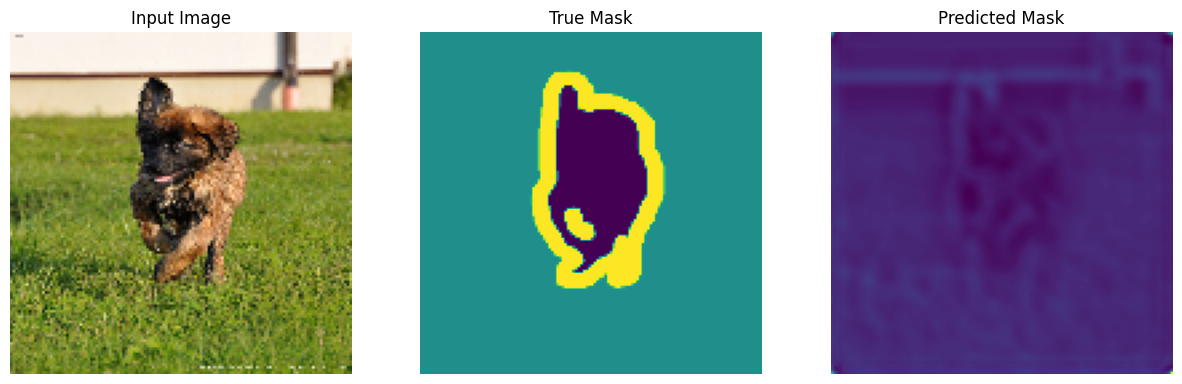

In [12]:
# Get a batch of test images and masks
for image, mask in test_dataset.take(1):
    sample_image, sample_mask = image[0], mask[0]
    prediction = model.predict(tf.expand_dims(sample_image, axis=0))[0]
    display([sample_image, sample_mask, prediction])

1/1 [==============================] - 0s 19ms/step


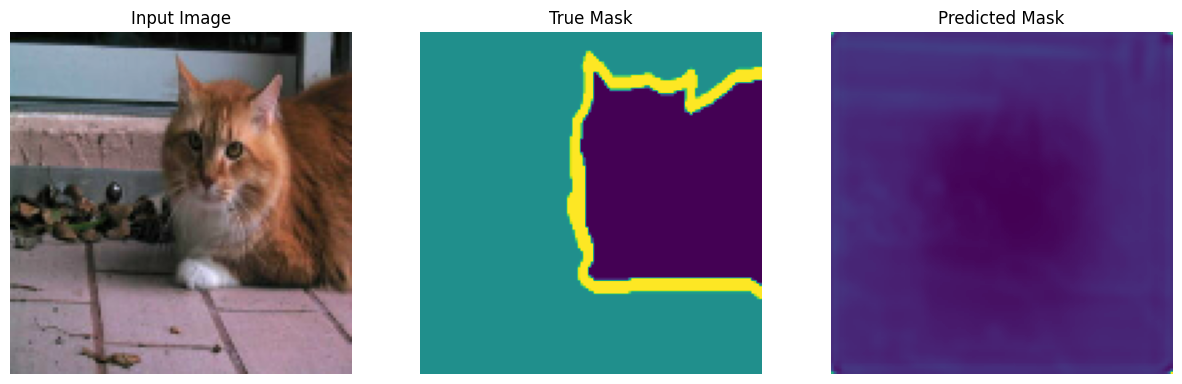

In [13]:
# Get a batch of test images and masks
for image, mask in test_dataset.take(1):
    sample_image, sample_mask = image[1], mask[1]
    prediction = model.predict(tf.expand_dims(sample_image, axis=0))[0]

    display([sample_image, sample_mask, prediction])

1/1 [==============================] - 0s 18ms/step


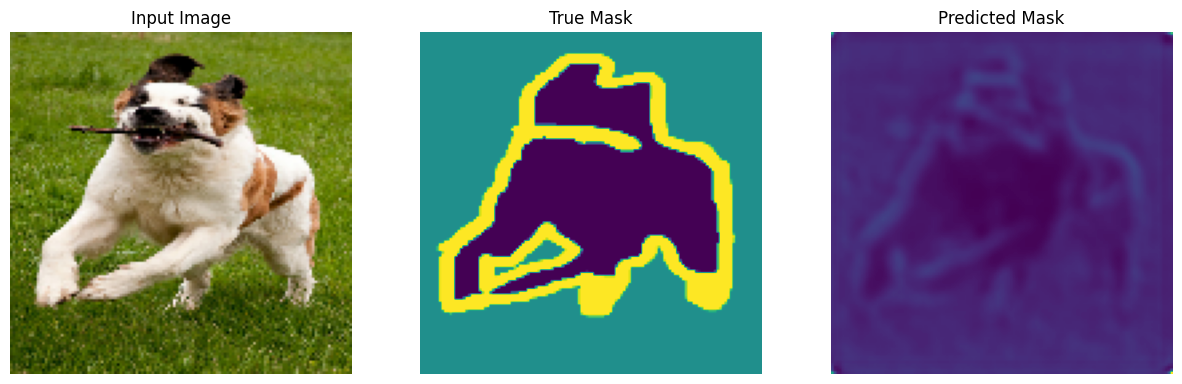

In [14]:
# Get a batch of test images and masks
for image, mask in test_dataset.take(1):
    sample_image, sample_mask = image[2], mask[2]
    prediction = model.predict(tf.expand_dims(sample_image, axis=0))[0]

    display([sample_image, sample_mask, prediction])